In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

## 1 数据清洗审阅与清洗

### 1.1 数据读入

In [2]:
# 读入数据
train_data=pd.read_csv('./cs-training.csv')

# 去除第一列
train_data=train_data.iloc[:,1:]

train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


下面使用info函数查看训练集的数据情况。

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

不难发现，月收入(MonthlyIncome)指标有许多缺失值，而家属人数NumberOfDependents缺失值也存在但是较少。

### 1.2 缺失值处理

采用随机森林法对MonthlyIncome变量的缺失值进行填充

In [7]:
def set_missing(df):
    process_df = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    # 分成已知特征值和未知特征值两部分
    known = process_df[process_df['MonthlyIncome'].notnull()].values # 将表格转换为矩阵
    unknown = process_df[process_df['MonthlyIncome'].isnull()].values
    # x为特征属性
    X = known[:,1:]
    # Y为结果标签值,即要预测的MonthlyIncome
    Y = known[:,0]
    rfr = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,Y)
    predicted = rfr.predict(unknown[:,1:]).round(0)
    # 用得到的预测结果填补原始缺失数据
    df.loc[(df['MonthlyIncome'].isnull()),'MonthlyIncome'] = predicted
    return df
train_data = set_missing(train_data)

特征量NumberOfDependts缺失值较少，直接删除有缺失值的样本

In [8]:
train_data = train_data.dropna() # 删除较少的缺失值
train_data = train_data.drop_duplicates() # 删除重复项
train_data.to_csv('MissingData.csv',index = False)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145563 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      145563 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  145563 non-null  float64
 2   age                                   145563 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  145563 non-null  int64  
 4   DebtRatio                             145563 non-null  float64
 5   MonthlyIncome                         145563 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       145563 non-null  int64  
 7   NumberOfTimes90DaysLate               145563 non-null  int64  
 8   NumberRealEstateLoansOrLines          145563 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  145563 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

经过填补和删除缺失值后，所有特征的数据量都为145563

### 1.3 异常值处理

异常值是指明显偏离大多数抽样数据的数值，比如客户的年龄大于100或小于0时，通常认为该值为异常值。在统计学中，常把低于Q1-1.5IQR的值和高于Q3+1.5IQR的值作为异常值。通过绘制箱型图能很明显的看到异常值。

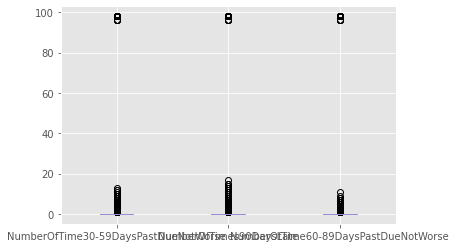

In [12]:
# 选择3,7,9做箱线图
plt.style.use('ggplot')
data_box = train_data.iloc[:,[3,7,9]]
data_box.boxplot()
plt.show()

在这三个特征之中有两组样本偏离了其他样本的分布，可以将其去除

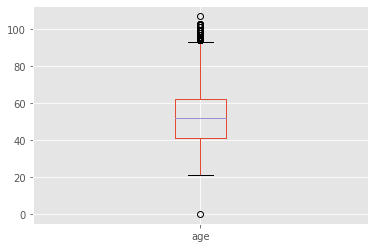

In [13]:
# 年龄箱线图
dataage = train_data['age'] # series类型
dataage = train_data[['age']] # dataframe类型
dataage.boxplot()
plt.show()

age为0的样本，明显是不符合常识的，应同样作为异常值舍弃

因此，剔除age为0的样本；以及剔除变量NumberOfTime30-59DaysPastDueNotWorse、NumberOfTimes90DaysLate、NumberOfTime60-89DaysPastDueNotWorse的异常值，剔除其中一个变量的96、98值，其他变量的96、98两个值也会相应被剔除

In [14]:
# 剔除异常值
train_data = train_data[train_data['age'] > 0]
train_data = train_data[train_data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]

数据集中好客户为0，违约客户为1，考虑到正常的理解，能正常履约并支付利息的客户为1，所以我们将其取反

In [16]:
# 变量SeriousDlqin2yrs取反，处理后即好客户为1，违约客户为0
train_data['SeriousDlqin2yrs'] = 1-train_data['SeriousDlqin2yrs']

### 1.4 数据切分

为了验证模型的拟合效果，需要对数据集进行切分，分成训练集和测试集

In [17]:
Y = train_data['SeriousDlqin2yrs']
X = train_data.iloc[:,1:]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
train = pd.concat([Y_train,X_train],axis = 1)
test = pd.concat([Y_test,X_test],axis = 1)
train.to_csv('TrainData.csv',index = False)
test.to_csv('TestData.csv',index = False)

## 2 探索性分析

在建立模型之前，我们一般会对现有的数据进行探索性数据分析（Exploratory Data Analysis）。EDA是指对已有的数据(特别是调查或观察得来的原始数据)在尽量少的先验假定下进行探索。常用的探索性数据分析方法有：直方图、散点图和箱线图等。例如对特征量年龄和月收入进行分析：

### 2.1 对年龄进行分析

d:\my python space\nlp\venv_3.7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


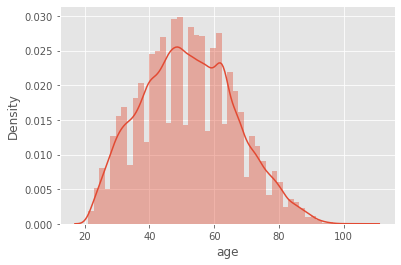

In [19]:
age = train_data['age']
sns.distplot(age)
plt.show()

年龄的分布大致呈正态分布，符合统计分析假设

### 2.2 对收入进行分析

d:\my python space\nlp\venv_3.7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


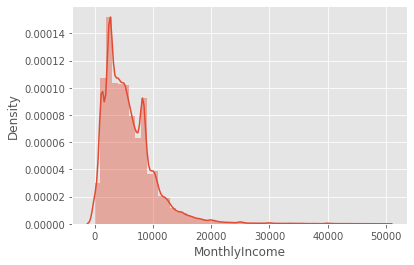

In [20]:
# 对MonthlyIncome进行分析，为了使图形更直观，将x轴范围设置在50000以内
mi = train_data[train_data['MonthlyIncome'] < 50000]['MonthlyIncome']
sns.distplot(mi)
plt.show()

月收入的分布大致呈正态分布，符合统计分析假设

## 3 变量选择

特征变量选择(排序)决定了模型性能，正确的选择特征变量能够帮助理解数据特点、底层结构，对进一步改善模型、算法均有重要作用。在此我采用通过WOE分析方法选择信用评分模型的变量，即通过比较指标分箱和对应分箱的违约概率来确定指标是否符合经济意义。

### 3.1 分箱处理

信用评分卡开发一般常用的方法为等距分段、等深分段、最优分段。等距分段（Equval length intervals）是指分段的区间是一致的，比如年龄以十年作为一个分段；等深分段（Equal frequency intervals）是先确定分段数量，然后令每个分段中数据数量大致相等；最优分段（Optimal Binning）又叫监督离散化（supervised discretizaion），使用递归划分（Recursive Partitioning）将连续变量分为分段，背后是一种基于条件推断查找较佳分组的算法。首先选择对连续变量进行最优分段，在连续变量的分布不满足最优分段的要求时，再考虑对连续变量进行等距分段。

In [36]:
def mono_bin(Y,X,n = 20):
    good = Y.sum()
    bad = Y.count() - good
    r = 0
    while np.abs(r) < 1:
        d1 = pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.qcut(X,n)})
        d2 = d1.groupby(['Bucket'],as_index = True)
        r,p = stats.spearmanr(d2['X'].mean(),d2['Y'].mean()) # spearman秩相关系数是度量两个变量之间的统计相关性的指标
        n = n - 1
    d3 = pd.DataFrame(d2['X'].min(),columns=['min']) # 为什么是空表
    d3['min'] = d2['X'].min()
    d3['max'] = d2['X'].max()
    d3['sum'] = d2['Y'].sum()
    d3['total'] = d2['Y'].count()
    d3['rate'] = d2['Y'].mean()
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    d3['woe'] = np.log(d3['goodattribute'] / d3['badattribute'])
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
#     print(d3)
    # 这里原本是index
    d4 = d3.sort_values(by=['min'])
    woe = list(d4['woe'].values)
    print(d4)
    print('-' * 30)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua = X.quantile(i/(n+1)) # quantile求分位数，pos = (n+1)*p，n为数据的总个数，p为0-1之间的值
        cut.append(round(qua,4)) # round()方法返回浮点数x的四舍五入值。
    cut.append(float('inf'))
    return d4,iv,woe,cut

使用最优分段对于数据集中的RevolvingUtilizationOfUnsecuredLines、age、DebtRatio和MonthlyIncome进行分类。

In [37]:
dfx1,ivx1,woex1,cutx1 = mono_bin(train['SeriousDlqin2yrs'],train['RevolvingUtilizationOfUnsecuredLines'],n = 10) 
dfx2,ivx2,woex2,cutx2 = mono_bin(train['SeriousDlqin2yrs'],train['age'],n = 20)
dfx4,ivx4,woex4,cutx4 = mono_bin(train['SeriousDlqin2yrs'],train['DebtRatio'],n = 10)
dfx5,ivx5,woex5,cutx5 = mono_bin(train['SeriousDlqin2yrs'],train['MonthlyIncome'],n = 10)

                       min           max    sum  total      rate  \
Bucket                                                             
(-0.001, 0.0312]  0.000000      0.031215  24941  25437  0.980501   
(0.0312, 0.158]   0.031218      0.157927  24895  25437  0.978692   
(0.158, 0.558]    0.157928      0.558119  24149  25436  0.949402   
(0.558, 50708.0]  0.558127  50708.000000  20949  25437  0.823564   

                  goodattribute  badattribute       woe  
Bucket                                                   
(-0.001, 0.0312]       0.262719      0.072802  1.283343  
(0.0312, 0.158]        0.262235      0.079554  1.192807  
(0.158, 0.558]         0.254377      0.188904  0.297580  
(0.558, 50708.0]       0.220669      0.658741 -1.093666  
------------------------------
                min  max   sum  total      rate  goodattribute  badattribute  \
Bucket                                                                         
(20.999, 31.0]   21   31  7468   8393  0.889789     

其他变量无法使用最优分箱，使用人工选择的方式进行

In [39]:
# 针对不能最优分箱的变量
def self_bin(Y,X,cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y, 'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby(['Bucket'], as_index=True)
    d3 = pd.DataFrame(d2['X'].min(),columns=['min'])
    d3['min'] = d2['X'].min()
    d3['max'] = d2['X'].max()
    d3['sum'] = d2['Y'].sum()
    d3['total'] = d2['Y'].count()
    d3['rate'] = d2['Y'].mean()
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    # d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['woe'] = np.log(d3['goodattribute'] / d3['badattribute'])
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = d3.sort_values(by = 'min')
    print(d4)
    print('-' * 30)
    woe = list(d3['woe'].values)
    return d4,iv,woe

ninf = float('-inf')
pinf = float('inf')
cutx3 = [ninf,0,1,3,5,pinf]
cutx6 = [ninf,1,2,3,5,pinf]
cutx7 = [ninf,0,1,3,5,pinf]
cutx8 = [ninf,0,1,2,3,pinf]
cutx9 = [ninf,0,1,3,pinf]
cutx10 = [ninf,0,1,2,3,5,pinf]

dfx3,ivx3,woex3 = self_bin(train['SeriousDlqin2yrs'],train['NumberOfTime30-59DaysPastDueNotWorse'],cutx3)
dfx6,ivx6,woex6 = self_bin(train['SeriousDlqin2yrs'],train['NumberOfOpenCreditLinesAndLoans'],cutx6)
dfx7,ivx7,woex7 = self_bin(train['SeriousDlqin2yrs'],train['NumberOfTimes90DaysLate'],cutx7)
dfx8,ivx8,woex8 = self_bin(train['SeriousDlqin2yrs'],train['NumberRealEstateLoansOrLines'],cutx8)
dfx9,ivx9,woex9 = self_bin(train['SeriousDlqin2yrs'],train['NumberOfTime60-89DaysPastDueNotWorse'],cutx9)
dfx10,ivx10,woex10 = self_bin(train['SeriousDlqin2yrs'],train['NumberOfDependents'],cutx10)

             min  max    sum  total      rate  goodattribute  badattribute  \
Bucket                                                                       
(-inf, 0.0]    0    0  81862  85334  0.959313       0.862304      0.509614   
(0.0, 1.0]     1    1   9467  11139  0.849897       0.099722      0.245413   
(1.0, 3.0]     2    3   3102   4363  0.710979       0.032675      0.185087   
(3.0, 5.0]     4    5    416    733  0.567531       0.004382      0.046529   
(5.0, inf]     6   13     87    178  0.488764       0.000916      0.013357   

                  woe  
Bucket                 
(-inf, 0.0]  0.525955  
(0.0, 1.0]  -0.900558  
(1.0, 3.0]  -1.734207  
(3.0, 5.0]  -2.362566  
(5.0, inf]  -2.679301  
------------------------------
             min  max    sum  total      rate  goodattribute  badattribute  \
Bucket                                                                       
(-inf, 1.0]    0    1   3048   3661  0.832559       0.032107      0.089975   
(1.0, 2.0]     2    

WOE(Weight of Evidence)就是自变量取某个值的时候对违约比例的一种影响，分箱过程中同时计算了证据权重WOE和信息价值IV(Information Value)，前者在建立逻辑回归模型时需要将所有的变量转为WOE，而后者则可以很好的展示变量的预测能力。

分箱之后计算了woe，WOE的全称是“Weight of Evidence”，即证据权重。WOE分析是对指标分箱、计算各个档位的WOE值并观察WOE值随指标变化的趋势。

WoE的数学定义是:woe=ln(goodattribute/badattribute)。goodattribute计算方式是每个箱子里的好客户数量/数据集里总的好客户数量；badattribute计算方式是每个箱子里的坏客户数量/数据集里总的坏客户数量。

不同的特征，最优分箱后产生不同的箱子个数，每一个区间对应一个woe值。最后得到的woex1是列表中存放着x1特征分箱后所有的woe。

### 3.2 变量相关性分析

用经过清洗后的数据查看变量间的相关性。相关程度用相关系数r表示，-1≤r<1，r的绝对值越大，表示变量之间的相关程度越高，r为负数时，表示一个变量的增加可能引起另一个变量的减少，此时，叫做负相关。

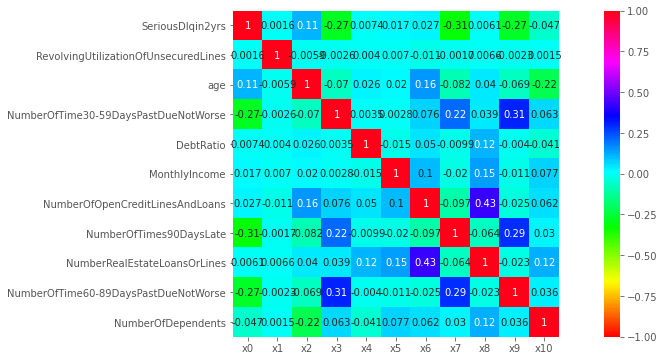

In [40]:
corr = train_data.corr()
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
yticks = list(corr.index) # y轴标签
fig = plt.figure()
fig.set_size_inches(16,6)
ax1 = fig.add_subplot(111)
# 默认是0到1，vmin和vmax可自定义设置
sns.heatmap(corr,vmin=-1,vmax=1,cmap='hsv',annot=True,square=True)
ax1.set_xticklabels(xticks,rotation=0)
ax1.set_yticklabels(yticks,rotation=0)
plt.show()

各自变量之间的相关性是非常小的，不存在多重共线性问题，如果存在多重共线性，即有可能存在两个变量高度相关，需要降维或剔除处理
NumberOfTime30-59DaysPastDueNotWorse，NumberOfTimes90DaysLate和NumberOfTime60-89DaysPastDueNotWorse这三个特征对于所要预测的值SeriousDlqin2yrs(因变量)有较强的相关性

### 3.3 IV筛选

建模之前需要先检验变量之间的相关性，如果自变量之间具有强相关性，则会影响模型的准确性；如果自变量和因变量之间具有强相关性，则需要重点关注，后续提取特征时需要保留。

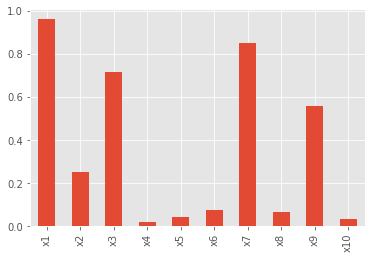

In [41]:
ivall = pd.Series([ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10],
                  index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
fig = plt.figure()
ax1 = fig.add_subplot(111)
ivall.plot(kind='bar',ax = ax1)
plt.show()

DebtRatio、MonthlyIncome、NumberOfOpenCreditLinesAndLoans、NumberRealEstateLoansOrLines和NumberOfDependents变量的IV值明显较低，预测能力差，所以删除

## 4 模型分析

证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式，在建立模型之前需要将筛选后的变量转换为WoE值，便于信用评分。WOE转换的目的是为了剔除一些变量，原因或者是因为它们不能增加模型值，或者是因为与其模型相关系数有关的误差较大。建立标准信用评分卡也可以不采用WOE转换，但Logistic回归模型需要处理更大数量的自变量，尽管这样会增加建模程序的复杂性，但最终得到的评分卡都是一样的。

### 4.1 WOE转换

根据之前分箱结果进行woe值替换，并将转化结果构造出模型的训练集，即将选取的特征woe化并舍弃不需要的特征，仅保留woe转码后的变量。

In [43]:
# WOE转换
def replace_woe(series,cut,woe):
    list = []
    i = 0
    while i<len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

train = pd.read_csv('TrainData.csv')
train['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'],cutx1,woex1))
train['age'] = Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101747 entries, 0 to 101746
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      101747 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  101747 non-null  float64
 2   age                                   101747 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  101747 non-null  float64
 4   DebtRatio                             101747 non-null  float64
 5   MonthlyIncome                         101747 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       101747 non-null  float64
 7   NumberOfTimes90DaysLate               101747 non-null  float64
 8   NumberRealEstateLoansOrLines          101747 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  101747 non-null  float64
 10  NumberOfDependents                    101747 non-null  float64
dtype

In [44]:
test = pd.read_csv('TestData.csv')
test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      43607 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  43607 non-null  float64
 2   age                                   43607 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  43607 non-null  float64
 4   DebtRatio                             43607 non-null  float64
 5   MonthlyIncome                         43607 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       43607 non-null  float64
 7   NumberOfTimes90DaysLate               43607 non-null  float64
 8   NumberRealEstateLoansOrLines          43607 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  43607 non-null  float64
 10  NumberOfDependents                    43607 non-null  float64
dtypes: float64(10),

### 4.2 Logistic模型建立

woe值替换之后选取特征量x1、x2、x3、x7、x9进行模型训练

In [46]:
# Logistic模型建立
import statsmodels.api as sm
Y = train['SeriousDlqin2yrs']
X = train.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y,X1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.186784
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               101747
Model:                          Logit   Df Residuals:                   101741
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Dec 2020   Pseudo R-squ.:                  0.2398
Time:                        16:26:15   Log-Likelihood:                -19005.
converged:                       True   LL-Null:                       -25000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    9.7360      0.1

逻辑回归各变量都已通过显著性检验，满足要求

### 4.3 模型验证

导入测试集的数据测试模型，通过ROC曲线和AUC来评估模型的拟合能力

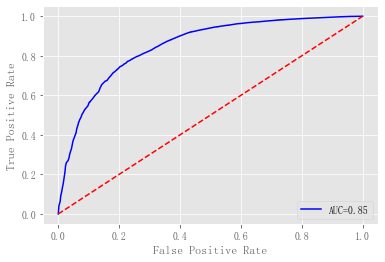

In [48]:
# 模型验证
from sklearn.metrics import roc_curve,auc
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['FangSong']
matplotlib.rcParams['axes.unicode_minus'] = False
Y_test = test['SeriousDlqin2yrs']
X_test=test.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
# 通过ROC曲线和AUC评估模型的拟合能力
X2 = sm.add_constant(X_test)
resu = result.predict(X2)
fpr,tpr,threshold = roc_curve(Y_test,resu)
rocauc = auc(fpr,tpr)
plt.plot(fpr,tpr,'b',label = 'AUC=%0.2f' % rocauc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AUC值为0.85，说明模型的预测能力较好，正确率较高。证明了用当前这五个特征构成信用评分卡的一部分分值是有效的，预测能力较好

## 5 信用评分卡构建

建立标准评分卡之前需要选取几个评分卡参数：基础分值、 PDO（比率翻倍的分值）和好坏比。此处，基础分值取600分，PDO为20（每高20分好坏比翻一倍），好坏比取20

个人总评分= 基础分 + 各部分得分

In [49]:
# 计算分数函数
def get_score(coe,woe,p):
    scores = []
    for w in woe:
        score = round(coe*w*p,0)
        scores.append(score)
    return scores

# 部分评分x1,x2,x3,x7,x9
# j和m相当于j是移动光标，m是跟着j，确定数的
def compute_score(series,cut,scores):
    i = 0
    list = []
    while i<len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value>=cut[j]:
                j = -1
            else:
                j = j-1
                m = m-1
        list.append(scores[m])
        i = i + 1
    return list
# list就是在x1里面挑一个值，这个值和series[i]是对应的
# score是等于模型系数*woe(一个woe对应一个score)*p值（比例因子）

coe=[9.738849,0.638002,0.505995,1.032246,1.790041,1.131956]      # 回归系数
import math
p = 20 / math.log(2) # p值（比例因子）
q = 600 - 20 * math.log(20) / math.log(2)
basescore = round(q + p * coe[0],0)
# 因为第一个是常数项
# 构建评分卡时候需要选出那些IV值高的特征就行，最后相加得到总分
x1 = get_score(coe[1],woex1,p)
x2 = get_score(coe[2],woex2,p)
x3 = get_score(coe[3],woex3,p)
x7 = get_score(coe[4],woex7,p)
x9 = get_score(coe[5],woex9,p)
# x1的四个值分别对应cut的四个区间.PDO Point Dounble Odds,就是好坏比翻一倍，odds就是好坏比
print("基础分:", basescore)
print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("逾期90天笔数对应的分数:{}".format(x7))
print("逾期60-89天笔数对应的分数:{}".format(x9))
test1 = pd.read_csv('TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1)) + basescore)
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'],cutx1,x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['score']= test1['BaseScore']+test1['x1']+test1['x2']+test1['x3']+test1['x7']+test1['x9']
test1.to_csv('scoredata.csv')

基础分: 795.0
可用额度比值对应的分数:[24.0, 22.0, 5.0, -20.0]
年龄对应的分数:[-8.0, -7.0, -5.0, -5.0, -3.0, -3.0, -2.0, -1.0, 3.0, 5.0, 9.0, 12.0, 15.0, 18.0]
逾期30-59天笔数对应的分数:[16.0, -27.0, -52.0, -70.0, -80.0]
逾期90天笔数对应的分数:[20.0, -102.0, -142.0, -166.0, -160.0]
逾期60-89天笔数对应的分数:[9.0, -60.0, -88.0, -95.0]


In [50]:
print(test1.loc[:,['SeriousDlqin2yrs','BaseScore','x1','x2','x3','x7','x9','score']].head())

   SeriousDlqin2yrs  BaseScore    x1    x2    x3     x7    x9  score
0                 1      795.0 -20.0  -5.0 -70.0 -142.0 -60.0  498.0
1                 1      795.0  22.0   5.0 -27.0 -102.0 -60.0  633.0
2                 1      795.0   5.0  -3.0 -27.0 -102.0 -60.0  608.0
3                 1      795.0  24.0  12.0 -27.0 -102.0 -60.0  642.0
4                 1      795.0  24.0  -5.0 -27.0 -102.0 -60.0  625.0


## 总结

挖掘分析kaggle上的数据Give Me Some Credit，结合信用评分卡的建立原理，通过数据预处理、变量选择、建模分析预测等方法，使用了随机森林算法拟合了缺失值，使用pandas包对数据进行了清理，并使用matplotlib、seaborn包将数据可视化，且使用了Logistic回归模型，最后利用模型验证过的部分特征，创建了一个简单的信用评分系统。